In [38]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import calendar


In [42]:
def load_data(file_path):
    '''
    Returns dataframe with raw data and a dataframe with lower case.

            Parameters:
                    file_path (str): path to raw data

            Returns:
                    df (DataFrame): raw data dataframe
                    df_lower (DataFrame): lower-case dataframe
    '''
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
    df_lower = df.apply(lambda x: x.astype(str).str.lower())
    df_lower['Date'] = pd.to_datetime(df_lower['Date'], format="%Y/%m/%d")
    return df, df_lower

In [41]:
def create_df_keywords(keywords_input, df_lower):
    '''
    Returns a dataframe with only rows that contain at least one of the keywords entered by user.

            Parameters:
                    keywords_input (list): list of keywords entered by user
                    df_lower (DataFrame): lower-case dataframe

            Returns:
                    input_df (DataFrame)
    '''
    keywords_input = keywords_input.lower()
    keywords_list = [word.strip() for word in keywords_input.split(',')]
    input_df = df_lower[df_lower.Text.str.contains('|'.join(keywords_list))==True]
    return input_df

In [65]:
def dates_article(df):
    '''
    Returns a dictionary with relevant dates related to the articles.
    
    Dictionary contains: date_max (last date of publication of an article containing at least one keyword), max_time_between_articles (maximal amount of time between articles), popular_month_year (month and year with most articles) and popular_year (most popular year).

            Parameters:
                    df (DataFrame): dataframe containing articles

            Returns:
                    dictionary
    '''
    df.reset_index(inplace=True, drop=True)
    def date_max(df):
        date_max = df.Date.max().strftime("%A, %d-%B-%Y")
        return {'date_max':date_max}

    def max_time_between_articles(df):    
        df['time_between'] = df["Date"].diff()
        max_time_between = df.time_between.max()
        index_max = df[df['time_between']==max_time_between].index.tolist()
        return {'max_time_between': f"{max_time_between.days} days", 
                'date_of_publication':df.loc[[index_max[0]]]['Date'].item().strftime("%A, %d-%B-%Y"), 
                'date_previous_publication':df.loc[[index_max[0]-1]]['Date'].item().strftime("%A, %d-%B-%Y")}
    
    def popular_month_year(df):
        month_year_row = df.groupby([pd.to_datetime(df['Date']).dt.year,
                           pd.to_datetime(df['Date']).dt.month]).Link.nunique().to_frame()
        max_month_year = month_year_row[month_year_row.Link==month_year_row.Link.max()].index.to_list()
        return {'month_year': f"{calendar.month_name[max_month_year[0][1]]} {max_month_year[0][0]}"}
    
    def popular_year(df):
        years = df.groupby(pd.to_datetime(df['Date']).dt.year).Link.nunique().to_frame()
        year = years[years.Link==years.Link.max()].index
        if len(year) == 1:
            return {'year': year.item()}
        else:
            return {'year': str(year.to_list())[1:-1]}
    df = df.sort_values(by=['Date'], ascending=True)
    df = df.reset_index(drop=True)
    return date_max(df) | max_time_between_articles(df) | popular_month_year(df) | popular_year(df)
    

In [63]:
news, news_lower = load_data('Vegan_Articles.csv')
df = create_df_keywords('penis', news_lower)


In [45]:
year = df.groupby(pd.to_datetime(df['Date']).dt.year).Link.nunique().to_frame()
year

,Link
Date,
2017,1
2018,3
2019,3
2020,3
2021,2


In [53]:
len(year[year.Link==year.Link.max()].index)

3

In [59]:
str(year[year.Link==year.Link.max()].index.to_list())[1:-1]

'2018, 2019, 2020'

In [46]:
{'year': year[year.Link==year.Link.max()].index.item()}

ValueError: can only convert an array of size 1 to a Python scalar

In [66]:
dates_article(df)

{'date_max': 'Thursday, 02-December-2021',
 'max_time_between': '381 days',
 'date_of_publication': 'Monday, 29-April-2019',
 'date_previous_publication': 'Friday, 13-April-2018',
 'month_year': 'July 2020',
 'year': '2018, 2019, 2020'}

In [25]:
def create_text(df, col):
    '''
    Returns a string with text of all rows of a certain column in a dateframe. 

            Parameters:
                    df (DataFrame): a dataframe with at least one column of type string
                    col (str): name of a column in df

            Returns:
                    text (str)
    '''
    text = " ".join(line for line in df[col].astype(str))
    return text

In [26]:
text = create_text(file, 'Text')

stopwords = set(STOPWORDS)

In [36]:
stopwords = set(STOPWORDS) | set('s')

In [37]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [28]:
stopwords_input = input('Type words to be excluded, separated by commas.')
stopwords_list = [word.strip() for word in stopwords_input.split(',')]




Type words to be excluded, separated by commas.vegan, will, s


In [29]:
stopwords_list

['vegan', 'will', 's']

In [31]:
stopwords.update(stopwords_list)

In [32]:

stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

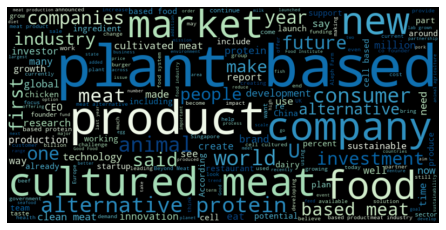

In [33]:

wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, colormap='GnBu').generate(text)
# Display the generated image:
fig_cloud, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig_cloud.tight_layout(pad=0)

In [ ]:
keywords_input = keywords_input.lower()
    keywords_list = keywords_input.split(",")
    input_df = df_lower[df_lower.Text.str.contains('|'.join(keywords_list))==True]

In [ ]:
stopwords_list

In [22]:
'|'.join(stopwords_list)

'vegan| will| s'